In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../WELFake_Dataset_processed.csv')
df

,Unnamed: 0.1,Unnamed: 0,title,text,label,all
0,0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,1,1,NaN,Did they post their votes for Hillary already?,1,Did they post their votes for Hillary already?
2,2,2,UNBELIEVABLE! OBAMAS ATTORNEY GENERAL SAYS MOS...,"Now, most of the demonstrators gathered last n...",1,UNBELIEVABLE! OBAMAS ATTORNEY GENERAL SAYS MOS...
3,3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...
...,...,...,...,...,...,...
72129,72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0,Russians steal research on Trump in hack of U....
72130,72130,72130,WATCH: Giuliani Demands That Democrats Apologi...,"You know, because in fantasyland Republicans n...",1,WATCH: Giuliani Demands That Democrats Apologi...
72131,72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0,Migrants Refuse To Leave Train At Refugee Camp...
72132,72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trumps combativ...,0,Trump tussle gives unpopular Mexican leader mu...


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
all_vectorizer = TfidfVectorizer()
X = all_vectorizer.fit_transform(df['all'])
X.shape

(72134, 217038)

In [5]:
tfidf_vectorized_output = X

In [6]:
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

clustered = KMeans(n_clusters=2, random_state=0, n_init="auto").fit_predict(tfidf_vectorized_output)

In [7]:
lsa = TruncatedSVD(n_components=2)
df2d = pd.DataFrame(lsa.fit_transform(tfidf_vectorized_output), columns=list('xy'))
df2d['label'] = df['label']
df2d['cluster'] = clustered

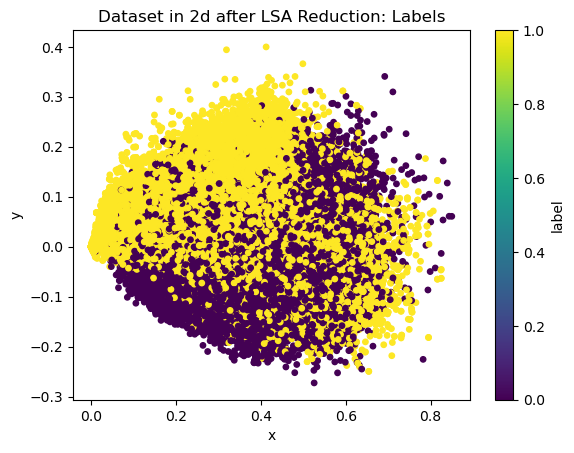

In [8]:
from matplotlib import pyplot as plt
from matplotlib import colors
%matplotlib inline

# Plot Data Visualization (Matplotlib)
df2d.plot.scatter(x='x', y='y', c='label',cmap="viridis", s=15)
plt.title("Dataset in 2d after LSA Reduction: Labels")

plt.show()

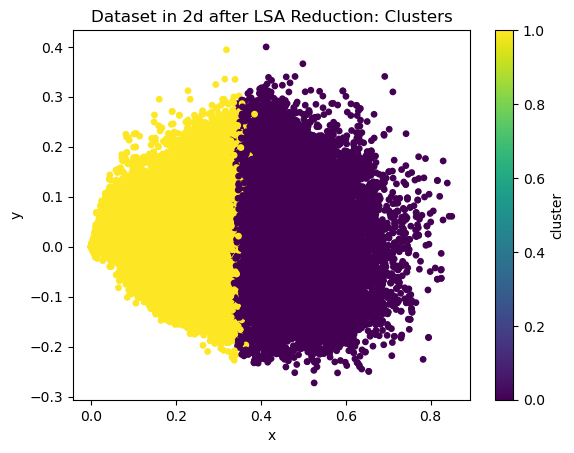

In [9]:
from matplotlib import pyplot as plt
from matplotlib import colors
%matplotlib inline

# Plot Data Visualization (Matplotlib)
df2d.plot.scatter(x='x', y='y', c='cluster',cmap="viridis", s=15)
plt.title("Dataset in 2d after LSA Reduction: Clusters")
plt.show()

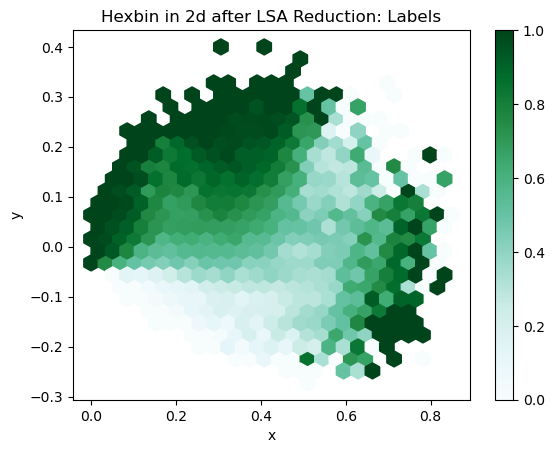

In [10]:
%matplotlib inline

# Plot Data Visualization (Matplotlib)
df2d.plot.hexbin(x='x', y='y',C='label', gridsize=25)
plt.title("Hexbin in 2d after LSA Reduction: Labels")
plt.show()

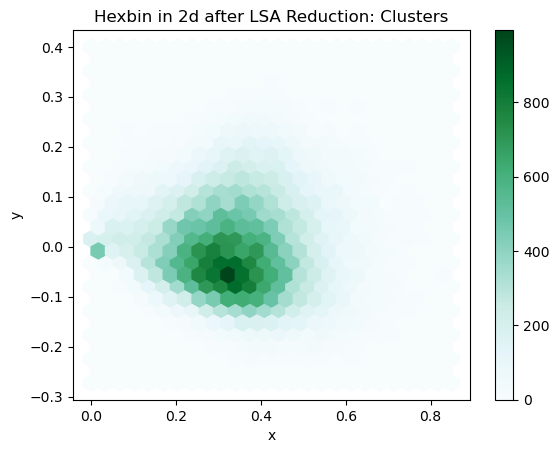

In [11]:
%matplotlib inline

# Plot Data Visualization (Matplotlib)
df2d.plot.hexbin(x='x', y='y', gridsize=25)
plt.title("Hexbin in 2d after LSA Reduction: Clusters")
plt.show()

In [12]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline

def bench_clustering(cluster, name, data, labels):
    """Benchmark to evaluate various clustering strategies and initialization methods.

    Parameters
    ----------
    cluster : SciKit Learn Clustering Algorithm
        A :class:`~sklearn.cluster.*` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(cluster).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [13]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import TruncatedSVD 

print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

kmeans = KMeans(init="k-means++", n_clusters=2, n_init=4, random_state=0)
bench_clustering(cluster=kmeans, name="k-means++", data=tfidf_vectorized_output, labels=df['label'])

kmeans = KMeans(init="random", n_clusters=2, n_init=4, random_state=0)
bench_clustering(cluster=kmeans, name="random", data=tfidf_vectorized_output, labels=df['label'])

pca = TruncatedSVD(n_components=2).fit(tfidf_vectorized_output)
kmeans = KMeans(init=pca.components_, n_clusters=2, n_init=1)
bench_clustering(cluster=kmeans, name="PCA-based", data=tfidf_vectorized_output, labels=df['label'])

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	8.337s	62932	0.004	0.004	0.004	0.006	0.004	0.016
random   	5.643s	62932	0.004	0.004	0.004	0.006	0.004	0.014
PCA-based	1.866s	62932	0.004	0.004	0.004	0.006	0.004	0.013


In [15]:
dbscan = DBSCAN(eps=.3, min_samples=10)
bench_clustering(cluster=dbscan, name="DBSCAN", data=tfidf_vectorized_output, labels=df['label'])

In [14]:
# spectral = SpectralClustering(n_clusters=2, assign_labels='cluster_qr', eigen_solver='amg')
# spectral.fit(X=X[:100])